# Import libraries

In [232]:
import numpy as np
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.metrics import f1_score, recall_score, confusion_matrix, classification_report, precision_recall_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# Load Dataset

In [233]:
data = pd.read_excel(r"C:\Users\320118090\Desktop\School\Thesis\Data\Renewed(v1).xlsx")

# Data Exploration and Cleaning

In [234]:
data.head()

,SoldTo,iCon Account ID,iCon Market,BG,Contract Classification,Contract Date,ContractYear,Start Date,End Date,Tenure,...,Renewal Count,# Contracts Warranty Converted,Total Warranty Contracts,# Contracts Extended Warranty Converted,Total Extended Warranty Contracts,Renewed,Net Value LC,Net Value EUR,Annualized Net Value LC,Annualized Net Value EUR
0,9448217,20604;588,LATAM,TC,Warranty,2020-06-15 00:00:00,2020.0,2020-05-06,2021-08-05,14.0,...,0,0,1,0,0,0,0.0,0.0,0.0,0.0
1,94264827,12868;158430;285,DACH,TC,Warranty,2014-01-14 00:00:00,2014.0,2013-12-12,2021-12-11,95.0,...,0,0,1,0,0,0,0.0,0.0,0.0,0.0
2,94264827,12868;158430;285,UKI,TC,Warranty,2014-01-14 00:00:00,2014.0,2013-12-12,2021-12-11,95.0,...,0,0,1,0,0,0,0.0,0.0,0.0,0.0
3,9493951,288,DACH,TC,Warranty,2013-05-28 00:00:00,2013.0,2013-01-09,2021-01-08,95.0,...,0,0,1,0,0,0,0.0,0.0,0.0,0.0
4,9499108,258,UKI,TC,Warranty,2013-03-12 00:00:00,2013.0,2013-02-04,2021-02-03,95.0,...,0,0,1,0,0,0,0.0,0.0,0.0,0.0


In [235]:
data.dtypes

SoldTo                                              int64
iCon Account ID                                    object
iCon Market                                        object
BG                                                 object
Contract Classification                            object
Contract Date                                      object
ContractYear                                      float64
Start Date                                 datetime64[ns]
End Date                                   datetime64[ns]
Tenure                                            float64
Contract End Year                                   int64
Total Contract Count                                int64
Total Warranty Count                                int64
Warranty Conversion Count                           int64
Extended Warranty Conversion Count                  int64
Total Extended Warranty Count                       int64
Renewal Count                                       int64
# Contracts Wa

In [236]:
data.rename({'Contract Date': 'ContractDate'}, axis=1, inplace=True)
data.rename({'Contract End Year': 'ContractEndYear'}, axis=1, inplace=True)
data.rename({'Total Contract Count': 'TotalContractCount'}, axis=1, inplace=True)
data.rename({'Total Warranty Count': 'TotalWarrantyCount'}, axis=1, inplace=True)
data.rename({'Total Extended Warranty Count': 'TotalExtendedWarrantyCount'}, axis=1, inplace=True)
data.rename({'iCon Market': 'Market'}, axis=1, inplace=True)
data.head()

,SoldTo,iCon Account ID,Market,BG,Contract Classification,ContractDate,ContractYear,Start Date,End Date,Tenure,...,Renewal Count,# Contracts Warranty Converted,Total Warranty Contracts,# Contracts Extended Warranty Converted,Total Extended Warranty Contracts,Renewed,Net Value LC,Net Value EUR,Annualized Net Value LC,Annualized Net Value EUR
0,9448217,20604;588,LATAM,TC,Warranty,2020-06-15 00:00:00,2020.0,2020-05-06,2021-08-05,14.0,...,0,0,1,0,0,0,0.0,0.0,0.0,0.0
1,94264827,12868;158430;285,DACH,TC,Warranty,2014-01-14 00:00:00,2014.0,2013-12-12,2021-12-11,95.0,...,0,0,1,0,0,0,0.0,0.0,0.0,0.0
2,94264827,12868;158430;285,UKI,TC,Warranty,2014-01-14 00:00:00,2014.0,2013-12-12,2021-12-11,95.0,...,0,0,1,0,0,0,0.0,0.0,0.0,0.0
3,9493951,288,DACH,TC,Warranty,2013-05-28 00:00:00,2013.0,2013-01-09,2021-01-08,95.0,...,0,0,1,0,0,0,0.0,0.0,0.0,0.0
4,9499108,258,UKI,TC,Warranty,2013-03-12 00:00:00,2013.0,2013-02-04,2021-02-03,95.0,...,0,0,1,0,0,0,0.0,0.0,0.0,0.0


# Replace NaN values with zero

In [237]:
data['TotalContractCount'] = data['TotalContractCount'].replace({" ":'0'})
data['TotalWarrantyCount'] = data['TotalWarrantyCount'].replace({" ":'0'})
data['TotalExtendedWarrantyCount'] = data['TotalExtendedWarrantyCount'].replace({" ":'0'})


In [238]:
data = data.drop('iCon Account ID', axis=1)

In [239]:
data = data.drop('ContractDate', axis=1)

# Drop non-important features

# Change wrong types

In [240]:
data.dtypes

SoldTo                                              int64
Market                                             object
BG                                                 object
Contract Classification                            object
ContractYear                                      float64
Start Date                                 datetime64[ns]
End Date                                   datetime64[ns]
Tenure                                            float64
ContractEndYear                                     int64
TotalContractCount                                  int64
TotalWarrantyCount                                  int64
Warranty Conversion Count                           int64
Extended Warranty Conversion Count                  int64
TotalExtendedWarrantyCount                          int64
Renewal Count                                       int64
# Contracts Warranty Converted                      int64
Total Warranty Contracts                            int64
# Contracts Ex

In [241]:
tenure_count = Counter(data['Tenure']).most_common()
print("tenure_count" +str(tenure_count))

tenure_count[(11.0, 192627), (12.0, 53002), (95.0, 24811), (35.0, 13150), (14.0, 7312), (23.0, 3089), (59.0, 2836), (13.0, 2335), (2.0, 689), (26.0, 405), (47.0, 297), (96.0, 208), (5.0, 203), (0.0, 141), (10.0, 124), (16.0, 103), (15.0, 92), (9.0, 89), (6.0, 84), (8.0, 83), (1.0, 68), (20.0, 64), (3.0, 62), (17.0, 58), (7.0, 56), (29.0, 50), (24.0, 49), (25.0, 40), (4.0, 39), (36.0, 28), (44.0, 28), (34.0, 27), (27.0, 27), (32.0, 26), (68.0, 25), (18.0, 23), (101.0, 22), (86.0, 20), (28.0, 16), (38.0, 14), (21.0, 13), (60.0, 12), (30.0, 12), (71.0, 12), (22.0, 10), (98.0, 10), (33.0, 9), (67.0, 8), (19.0, 7), (106.0, 6), (65.0, 6), (74.0, 6), (55.0, 5), (56.0, 5), (50.0, 5), (58.0, 4), (83.0, 4), (99.0, 4), (105.0, 4), (66.0, 4), (31.0, 3), (41.0, 3), (45.0, 3), (48.0, 3), (103.0, 3), (108.0, 2), (107.0, 2), (110.0, 2), (102.0, 2), (72.0, 2), (40.0, 2), (84.0, 2), (88.0, 2), (100.0, 2), (104.0, 2), (62.0, 2), (37.0, 2), (43.0, 2), (54.0, 2), (63.0, 1), (46.0, 1), (51.0, 1), (39.0, 1),

In [242]:
data['Tenure'] = data['Tenure'].replace({"nan":'0'})

In [243]:
tenure_count = Counter(data['Tenure']).most_common()
print("tenure_count" +str(tenure_count))

tenure_count[(11.0, 192627), (12.0, 53002), (95.0, 24811), (35.0, 13150), (14.0, 7312), (23.0, 3089), (59.0, 2836), (13.0, 2335), (2.0, 689), (26.0, 405), (47.0, 297), (96.0, 208), (5.0, 203), (0.0, 141), (10.0, 124), (16.0, 103), (15.0, 92), (9.0, 89), (6.0, 84), (8.0, 83), (1.0, 68), (20.0, 64), (3.0, 62), (17.0, 58), (7.0, 56), (29.0, 50), (24.0, 49), (25.0, 40), (4.0, 39), (36.0, 28), (44.0, 28), (34.0, 27), (27.0, 27), (32.0, 26), (68.0, 25), (18.0, 23), (101.0, 22), (86.0, 20), (28.0, 16), (38.0, 14), (21.0, 13), (60.0, 12), (30.0, 12), (71.0, 12), (22.0, 10), (98.0, 10), (33.0, 9), (67.0, 8), (19.0, 7), (106.0, 6), (65.0, 6), (74.0, 6), (55.0, 5), (56.0, 5), (50.0, 5), (58.0, 4), (83.0, 4), (99.0, 4), (105.0, 4), (66.0, 4), (31.0, 3), (41.0, 3), (45.0, 3), (48.0, 3), (103.0, 3), (108.0, 2), (107.0, 2), (110.0, 2), (102.0, 2), (72.0, 2), (40.0, 2), (84.0, 2), (88.0, 2), (100.0, 2), (104.0, 2), (62.0, 2), (37.0, 2), (43.0, 2), (54.0, 2), (63.0, 1), (46.0, 1), (51.0, 1), (39.0, 1),

In [244]:
data['Tenure'] = data['Tenure'].fillna(0)

In [245]:

data['ContractYear'] = data['ContractYear'].astype(int)
data['Tenure'] = data['Tenure'].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [246]:
data['ContractYear'] = data['ContractYear'].fillna(0)

In [247]:
data['ContractYear'] = data['ContractYear'].astype(object)

In [248]:
data.dtypes

SoldTo                                              int64
Market                                             object
BG                                                 object
Contract Classification                            object
ContractYear                                       object
Start Date                                 datetime64[ns]
End Date                                   datetime64[ns]
Tenure                                            float64
ContractEndYear                                     int64
TotalContractCount                                  int64
TotalWarrantyCount                                  int64
Warranty Conversion Count                           int64
Extended Warranty Conversion Count                  int64
TotalExtendedWarrantyCount                          int64
Renewal Count                                       int64
# Contracts Warranty Converted                      int64
Total Warranty Contracts                            int64
# Contracts Ex

# Look at how data looks like

In [249]:
data.describe()

,SoldTo,Tenure,ContractEndYear,TotalContractCount,TotalWarrantyCount,Warranty Conversion Count,Extended Warranty Conversion Count,TotalExtendedWarrantyCount,Renewal Count,# Contracts Warranty Converted,Total Warranty Contracts,# Contracts Extended Warranty Converted,Total Extended Warranty Contracts,Renewed,Net Value LC,Net Value EUR,Annualized Net Value LC,Annualized Net Value EUR
count,3.026370e+05,302637.000000,302637.000000,302637.000000,302637.000000,302637.000000,302637.000000,302637.000000,302637.000000,302637.000000,302637.000000,302637.000000,302637.000000,302637.000000,3.026370e+05,302637.000000,3.026370e+05,302637.000000
mean,5.054309e+07,19.916008,2020.613012,0.016944,0.901433,0.129558,0.001480,0.016369,0.010339,0.129558,0.901433,0.001480,0.016369,0.141361,3.102256e+05,620.255590,2.638064e+05,435.726315
std,4.552328e+07,23.630356,0.487062,0.129063,0.298080,0.335817,0.038447,0.126892,0.101155,0.335817,0.298080,0.038447,0.126892,0.348394,1.364924e+07,10286.921982,1.068740e+07,6066.888289
min,1.240230e+05,0.000000,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,7.165390e+05,11.000000,2020.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,9.400276e+07,11.000000,2021.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
75%,9.433071e+07,12.000000,2021.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
max,9.467790e+07,220.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.358757e+09,845756.040000,1.891036e+09,843445.230000


In [250]:
data = data.drop('Start Date', axis=1)

In [251]:
data = data.drop('End Date', axis=1)

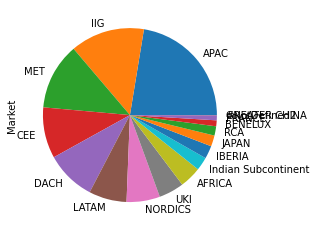

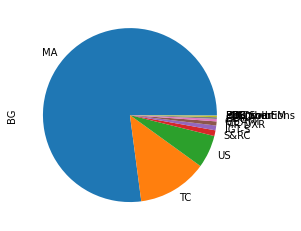

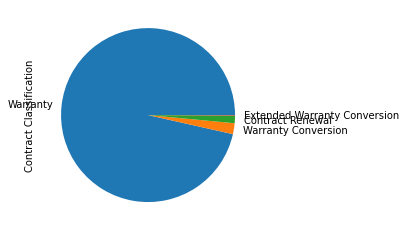

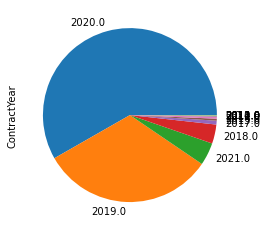

In [252]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()

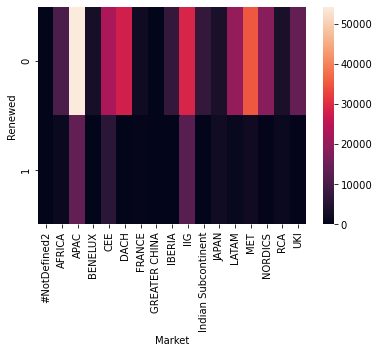

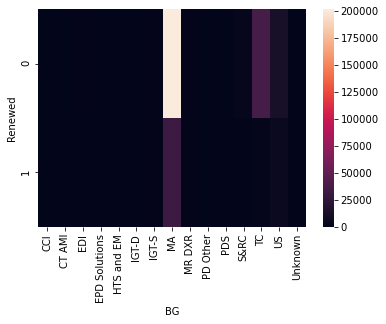

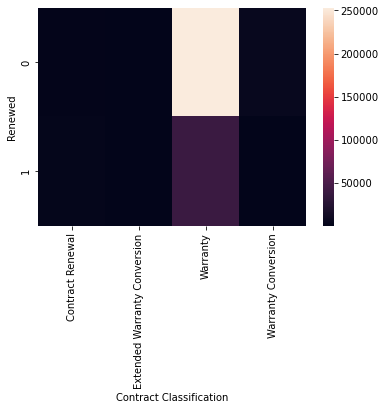

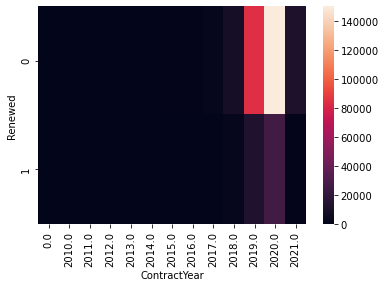

In [253]:
for col in data.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(data['Renewed'], data[col]), fmt='d')

In [254]:
data = pd.get_dummies(data,columns=['Market'],prefix='Market')

In [255]:
data.dtypes

SoldTo                                       int64
BG                                          object
Contract Classification                     object
ContractYear                                object
Tenure                                     float64
ContractEndYear                              int64
TotalContractCount                           int64
TotalWarrantyCount                           int64
Warranty Conversion Count                    int64
Extended Warranty Conversion Count           int64
TotalExtendedWarrantyCount                   int64
Renewal Count                                int64
# Contracts Warranty Converted               int64
Total Warranty Contracts                     int64
# Contracts Extended Warranty Converted      int64
Total Extended Warranty Contracts            int64
Renewed                                      int64
Net Value LC                               float64
Net Value EUR                              float64
Annualized Net Value LC        

In [256]:
data = pd.get_dummies(data,columns=['BG'],prefix='BG')

In [257]:
data = pd.get_dummies(data,columns=['Contract Classification'],prefix='Contract Classification')

In [258]:
data.dtypes

SoldTo                                                    int64
ContractYear                                             object
Tenure                                                  float64
ContractEndYear                                           int64
TotalContractCount                                        int64
TotalWarrantyCount                                        int64
Warranty Conversion Count                                 int64
Extended Warranty Conversion Count                        int64
TotalExtendedWarrantyCount                                int64
Renewal Count                                             int64
# Contracts Warranty Converted                            int64
Total Warranty Contracts                                  int64
# Contracts Extended Warranty Converted                   int64
Total Extended Warranty Contracts                         int64
Renewed                                                   int64
Net Value LC                            

# Random undersampling

In [259]:
target_count = data.Renewed.value_counts()

Class 0: 259856
Class 1: 42781
Proportion: 6.07 : 1


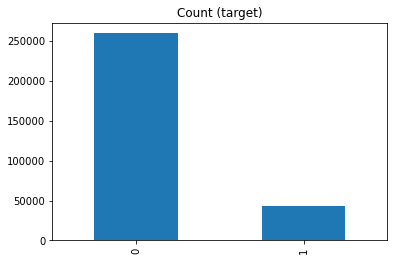

In [260]:

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [261]:
df_class_0 = data[data['Renewed'] == 0]
df_class_1 = data[data['Renewed'] == 1]

In [262]:
count_class_0, count_class_1 = data.Renewed.value_counts()

Random under-sampling:
0    42781
1    42781
Name: Renewed, dtype: int64


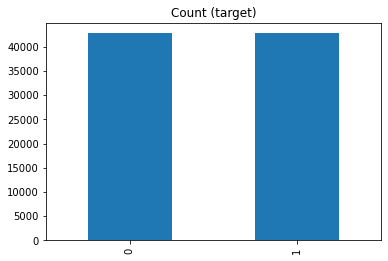

In [263]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Renewed.value_counts())

df_test_under.Renewed.value_counts().plot(kind='bar', title='Count (target)');

In [264]:
df_test_under.describe()

,SoldTo,Tenure,ContractEndYear,TotalContractCount,TotalWarrantyCount,Warranty Conversion Count,Extended Warranty Conversion Count,TotalExtendedWarrantyCount,Renewal Count,# Contracts Warranty Converted,...,BG_PD Other,BG_PDS,BG_S&RC,BG_TC,BG_US,BG_Unknown,Contract Classification_Contract Renewal,Contract Classification_Extended Warranty Conversion,Contract Classification_Warranty,Contract Classification_Warranty Conversion
count,8.556200e+04,85562.000000,85562.000000,85562.000000,85562.000000,85562.000000,85562.000000,85562.000000,85562.000000,85562.000000,...,85562.000000,85562.000000,85562.000000,85562.000000,85562.000000,85562.000000,85562.000000,85562.000000,85562.000000,85562.000000
mean,4.924118e+07,17.261237,2020.634207,0.040848,0.908698,0.458252,0.005236,0.014025,0.036570,0.458252,...,0.000164,0.000222,0.009549,0.091150,0.092518,0.000818,0.034560,0.002115,0.944111,0.019214
std,4.599841e+07,19.450358,0.481655,0.197938,0.288040,0.498257,0.072171,0.117594,0.187705,0.498257,...,0.012791,0.014900,0.097250,0.287824,0.289757,0.028591,0.182663,0.045945,0.229709,0.137278
min,1.240230e+05,0.000000,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.801900e+05,11.000000,2020.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.400276e+07,11.000000,2021.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,9.433071e+07,12.000000,2021.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.466848e+07,158.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [265]:
plt.figure()
sns.countplot(x='Contract Classification', hue='Renewed', data=df_test_under)

ValueError: Could not interpret input 'Contract Classification'

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure()
sns.countplot(x='ContractYear', hue='Renewed', data=df_test_under)

In [ ]:
plt.figure()
sns.countplot(x='BG', hue='Renewed', data=df_test_under)

In [ ]:
for col in df_test_under.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(data['Renewed'], data[col]), fmt='d')

# Split dataset between train and test 

In [ ]:
df = df_test_under.copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
trainset['Renewed'].value_counts(normalize=True)

In [ ]:
testset['Renewed'].value_counts(normalize=True)

In [ ]:
def preprocessing(trainset):
    
    X = trainset.drop('Renewed',axis=1)
    y = trainset['Renewed']
    
    print(y.value_counts())
    
    return X,y

In [ ]:
X_train, y_train = preprocessing(trainset)

In [ ]:
X_test, y_test = preprocessing(testset)

In [ ]:
preprocessor = make_pipeline(SelectKBest(f_classif,k=8))

In [ ]:
DecisionTree = make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
LR = make_pipeline(preprocessor,LogisticRegression(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor,StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor,StandardScaler(), KNeighborsClassifier())

In [ ]:
LR.fit(X=X_train, y=y_train)


In [ ]:
ypred = LR.predict(X_test)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

In [266]:
KNN.fit(X=X_train, y=y_train)

C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [18 38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\320118090\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('selectkbest', SelectKBest(k=8))])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [217]:
ypred1 = KNN.predict(X_test)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

[[8387    0]
 [ 101 8625]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8387
           1       1.00      0.99      0.99      8726

    accuracy                           0.99     17113
   macro avg       0.99      0.99      0.99     17113
weighted avg       0.99      0.99      0.99     17113

